<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Iris_data_set_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# I am going to load the iris dataset and let's do some exploration
df=sns.load_dataset("iris")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Lets see the shape of data
df.shape

(150, 5)

**We have 150 * 5 data in the above data set so let's do some exploration and apply the linear algorithm to find the target value.**

In [16]:
#Let's check whether we have the null value or not
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#To see a random of 10 sample from the dataset use .sample() method
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
74,6.4,2.9,4.3,1.3,versicolor
128,6.4,2.8,5.6,2.1,virginica
28,5.2,3.4,1.4,0.2,setosa
65,6.7,3.1,4.4,1.4,versicolor
33,5.5,4.2,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
106,4.9,2.5,4.5,1.7,virginica
83,6.0,2.7,5.1,1.6,versicolor
79,5.7,2.6,3.5,1.0,versicolor


In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

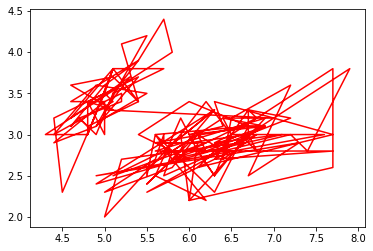

In [29]:
#So let's do some plotting before going into the algorithm 
plt.plot(df['sepal_length'],df['sepal_width'],color='red')
plt.show()

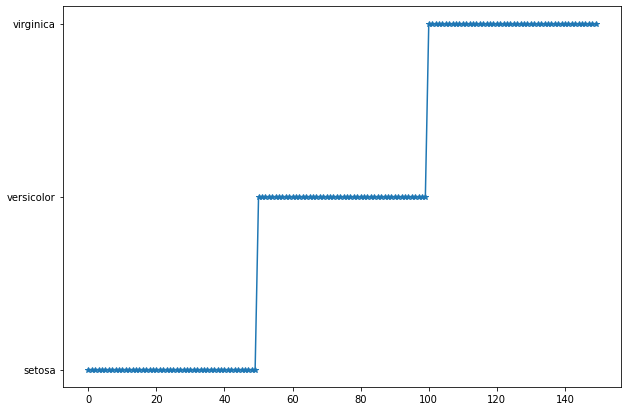

In [36]:
plt.figure(figsize=(10,7))
plt.plot(df['species'],marker="*")
plt.show()

#Modeling with scikit-learn

In [39]:
X = df.drop(['species'], axis=1)
y = df['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
#splitting the training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [45]:
logreg = LogisticRegression() #using logistic regression
logreg.fit(X_train, y_train) 
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [46]:
#let's do the prediction
logreg.predict([[6, 3, 4, 2]])

array(['versicolor'], dtype=object)

In [48]:
#put the df[0] to check if it is working correctly or not
logreg.predict([[5.1, 3.5, 1.4, 0.2]])

array(['setosa'], dtype=object)

#Lets try using decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [50]:
clf= DecisionTreeClassifier(random_state = 100)

#fitting the training data
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, clf_pred))

0.9666666666666667


In [51]:
#lets do the checking
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array(['setosa'], dtype=object)

In [54]:
from sklearn import tree

[Text(167.4, 201.90857142857143, 'X[2] <= 2.6\ngini = 0.666\nsamples = 90\nvalue = [30, 29, 31]'),
 Text(111.60000000000001, 170.84571428571428, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(223.20000000000002, 170.84571428571428, 'X[3] <= 1.75\ngini = 0.499\nsamples = 60\nvalue = [0, 29, 31]'),
 Text(167.4, 139.78285714285715, 'X[2] <= 5.45\ngini = 0.17\nsamples = 32\nvalue = [0, 29, 3]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 4.95\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(55.800000000000004, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(167.4, 77.65714285714284, 'X[2] <= 4.95\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(111.60000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(223.20000000000002, 46.59428571428572, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(167.4, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(279.0, 15.53142857142

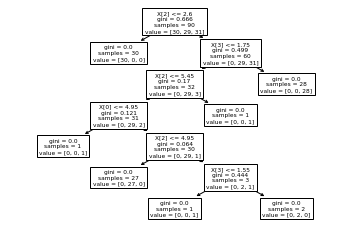

In [55]:
#plotting tree
tree.plot_tree(clf)

#Let's try with random forest


In [56]:
from sklearn.ensemble import RandomForestClassifier 

In [57]:
clfr= RandomForestClassifier(random_state = 100)

#fitting the training data
clfr.fit(X_train, y_train)
clfr_pred = clfr.predict(X_test)
print(metrics.accuracy_score(y_test, clfr_pred))

0.95
